In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


from datetime import datetime, timedelta
url_movies = "https://raw.githubusercontent.com/sebaslopez1984/LopezRecomendation/main/MovieDataSet/movies.csv"
url_rating = "https://raw.githubusercontent.com/sebaslopez1984/LopezRecomendation/main/MovieDataSet/ratings.csv"

In [8]:
# Cargo archivo CSV en un DataFrame de pandas
df_movies = pd.read_csv(url_movies)

print("")
# Ver dimensiones del dataset
print("Dimensiones del dataset:", df_movies.shape)


Dimensiones del dataset: (10329, 3)


In [10]:
#Elimino todos lso caracteres que no sean letras, numeros o espacios en blanco


def clean_title(title):
    title = re.sub("[^a-zA-Z0-9 ]", "", title)
    return title

#Hago una columna nueva quitando caracteres o espacion
df_movies["clean_title"] = df_movies["title"].apply(clean_title)

df_movies

In [11]:
#borro columna Title
df_movies = df_movies.drop(columns=['title'])

df_movies

,movieId,genres,clean_title
0,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story 1995
1,2,Adventure|Children|Fantasy,Jumanji 1995
2,3,Comedy|Romance,Grumpier Old Men 1995
3,4,Comedy|Drama|Romance,Waiting to Exhale 1995
4,5,Comedy,Father of the Bride Part II 1995
...,...,...,...
10324,146684,Animation|Children|Comedy,Cosmic Scrattastrophe 2015
10325,146878,Comedy,Le Grand Restaurant 1966
10326,148238,Comedy,A Very Murray Christmas 2015
10327,148626,Drama,The Big Short 2015


In [12]:
df_movies[['movie_title', 'release_year']] = df_movies['clean_title'].str.extract(r'^(.*?)(\d{4})$')
df_movies = df_movies.drop(columns=['clean_title'])
df_movies

,movieId,genres,movie_title,release_year
0,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995
1,2,Adventure|Children|Fantasy,Jumanji,1995
2,3,Comedy|Romance,Grumpier Old Men,1995
3,4,Comedy|Drama|Romance,Waiting to Exhale,1995
4,5,Comedy,Father of the Bride Part II,1995
...,...,...,...,...
10324,146684,Animation|Children|Comedy,Cosmic Scrattastrophe,2015
10325,146878,Comedy,Le Grand Restaurant,1966
10326,148238,Comedy,A Very Murray Christmas,2015
10327,148626,Drama,The Big Short,2015


In [13]:
# Verificar si hay valores nulos
print(df_movies.isnull().sum())

# Eliminar  nulos
df_movies = df_movies.dropna()

movieId         0
genres          0
movie_title     2
release_year    2
dtype: int64


In [14]:
# Verificar filas duplicadas
if df_movies.duplicated().sum() != 0:
  df_movies = df_movies.drop_duplicates()
else:
  print("no hay duplicados")

no hay duplicados


In [30]:
# Cargo archivo CSV en un DataFrame de pandas
df_rating = pd.read_csv(url_rating)

df_rating

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898


In [31]:
# Convertir el timestamp a una fecha legible
df_rating['timestamp'] = pd.to_datetime(df_rating['timestamp'], unit='s')

# Verificar si hay valores nulos
print(df_rating.isnull().sum())

# Eliminar  nulos
df_rating = df_rating.dropna()

print("")
# Verificar filas duplicadas
if df_rating.duplicated().sum() != 0:
  df_rating = df_rating.drop_duplicates()
else:
  print("no hay duplicados")

print("")
df_rating

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

no hay duplicados



,userId,movieId,rating,timestamp
0,1,16,4.0,2008-08-05 00:56:33
1,1,24,1.5,2008-08-05 00:23:27
2,1,32,4.0,2008-08-05 00:30:46
3,1,47,4.0,2008-08-05 00:35:56
4,1,50,4.0,2008-08-05 00:35:23
...,...,...,...,...
105334,668,142488,4.0,2015-12-31 04:24:04
105335,668,142507,3.5,2015-12-31 04:24:49
105336,668,143385,4.0,2015-11-01 14:36:25
105337,668,144976,2.5,2015-11-27 20:41:38


In [32]:
# Divido los generos para generar las conusltas
df_movies_exploded = df_movies.copy()
df_movies_exploded["genres"] = df_movies_exploded["genres"].str.split("|")
df_movies_exploded = df_movies_exploded.explode("genres").reset_index(drop=True)

# Verificar el resultado
print(df_movies_exploded.head())

   movieId     genres movie_title release_year
0        1  Adventure  Toy Story          1995
1        1  Animation  Toy Story          1995
2        1   Children  Toy Story          1995
3        1     Comedy  Toy Story          1995
4        1    Fantasy  Toy Story          1995


In [33]:
####Preguntas####


print("¿Cuáles son los géneros más vistos en el último año?")
print("")
# ajusto el año del dataset y que las fechas maximos son hasta 2015
last_year_available = df_rating["timestamp"].max().year
one_year_ago = datetime(last_year_available - 1, 1, 1)

ratings_last_year = df_rating[df_rating["timestamp"] >= one_year_ago]

df_rating["timestamp"] = pd.to_datetime(df_rating["timestamp"])
ratings_last_year = df_rating[df_rating["timestamp"] > one_year_ago]

# Uno ratings con peliculas
df_last_year = pd.merge(ratings_last_year, df_movies_exploded, on="movieId")

# Cuento acantidad de calificaciones por genero
genres_last_year = df_last_year.groupby("genres")["rating"].count().reset_index()
genres_last_year = genres_last_year.rename(columns={"rating": "count"}).sort_values(by="count", ascending=False)

# Mostrar los géneros más populares
genres_last_year.head(10)

¿Cuáles son los géneros más vistos en el último año?



,genres,count
8,Drama,3823
1,Action,3562
17,Thriller,2836
5,Comedy,2736
2,Adventure,2393
16,Sci-Fi,1917
6,Crime,1816
15,Romance,1147
9,Fantasy,1063
12,IMAX,877


Grafico de barras Punto 1


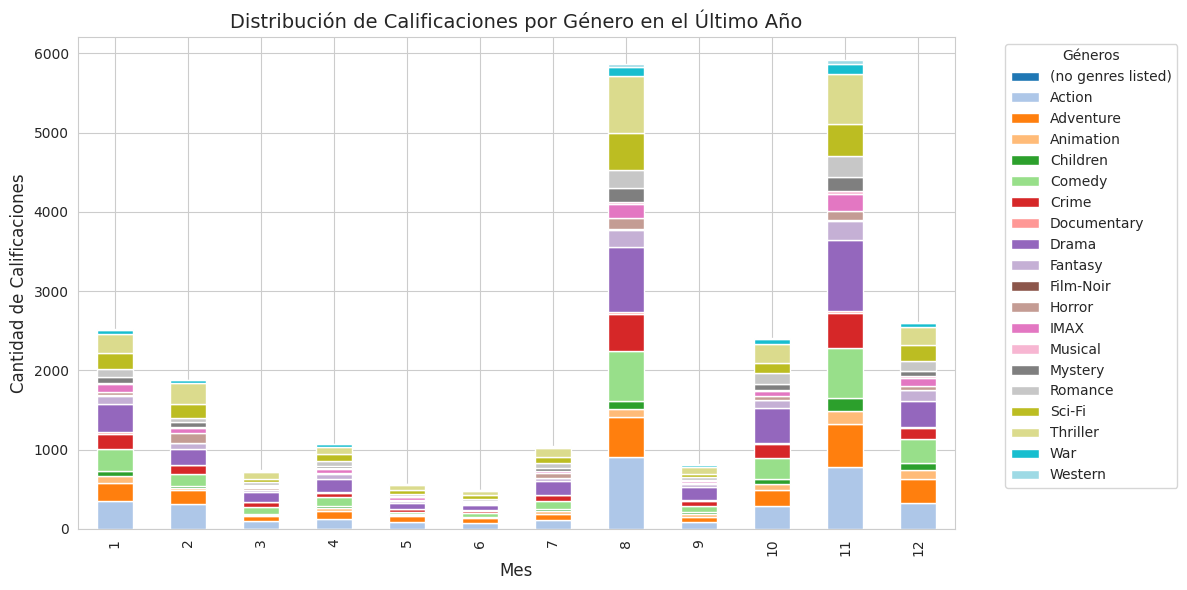

In [34]:


print("Grafico de barras Punto 1")

df_last_year["month"] = df_last_year["timestamp"].dt.month  # Extraer el mes
genres_by_month = df_last_year.groupby(["month", "genres"])["rating"].count().reset_index()


genres_pivot = genres_by_month.pivot(index="month", columns="genres", values="rating").fillna(0)


genres_pivot.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab20")

plt.title("Distribución de Calificaciones por Género en el Último Año", fontsize=14)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Cantidad de Calificaciones", fontsize=12)
plt.legend(title="Géneros", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [35]:
# Definir el ID de usuario para recomendar
user_id = 1

# Filtrar calificaciones del usuario
user_ratings = df_rating[df_rating["userId"] == user_id]

# Asegurar que df_movies_exploded esté correctamente definido
if "genres" in df_movies.columns:
    df_movies_exploded = df_movies.copy()
    df_movies_exploded["genres"] = df_movies_exploded["genres"].str.split("|")
    df_movies_exploded = df_movies_exploded.explode("genres")

# Fusionar ratings con películas y géneros
user_movie_genres = user_ratings.merge(df_movies_exploded, on="movieId")

# Contar la cantidad de veces que aparece cada género
user_genre_counts = user_movie_genres["genres"].value_counts()

# Obtener los 3 géneros favoritos del usuario
user_top_genres = user_genre_counts.head(3).index.tolist()

# Obtener películas vistas por el usuario
movies_watched = set(df_rating[df_rating["userId"] == user_id]["movieId"])

# Filtrar películas no vistas
movies_not_watched = df_movies_exploded[~df_movies_exploded["movieId"].isin(movies_watched)]

# Filtrar películas que pertenezcan a los géneros favoritos del usuario
recommended_movies = movies_not_watched[movies_not_watched["genres"].isin(user_top_genres)]

# Eliminar duplicados basados en movieId
recommended_movies = recommended_movies.drop_duplicates(subset=["movieId"])

# Seleccionar las primeras 10 películas recomendadas
top_10_movies = recommended_movies[["movie_title", "genres"]].head(10)

top_10_movies



,movie_title,genres
3,Waiting to Exhale,Drama
5,Heat,Action
8,Sudden Death,Action
9,GoldenEye,Action
10,American President The,Drama
13,Nixon,Drama
14,Cutthroat Island,Action
16,Sense and Sensibility,Drama
19,Money Train,Action
20,Get Shorty,Thriller


In [36]:
print("Las 5 generos mas vistos en el ultimo año y sus 5 pelicujlas mejores ranqueadas")


# Filtro data set (2015)
df_rating["timestamp"] = pd.to_datetime(df_rating["timestamp"])
ratings_last_year = df_rating[df_rating["timestamp"].dt.year == 2015]


df_movies_exploded = df_movies.explode("genres")  # Asegurarnos de que los géneros estén separados
merged_data = pd.merge(ratings_last_year, df_movies_exploded, on="movieId", how="inner")

#  géneros más vistos en el último año
top_genres = (
    merged_data.groupby("genres")
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
    .head(5)
)

# las 5 películas mejor puntuadas por cada uno de los 5 géneros más vistos
top_movies_by_genre = []
for genre in top_genres["genres"]:
    genre_data = merged_data[merged_data["genres"] == genre]
    top_movies = (
        genre_data.groupby(["movie_title", "genres"])["rating"]
        .mean()
        .reset_index()
        .sort_values(by="rating", ascending=False)
        .head(5)
    )
    top_movies["genre"] = genre  # Agregar el género como columna para referencia
    top_movies_by_genre.append(top_movies)

# Concatenar los resultados
top_movies_by_genre = pd.concat(top_movies_by_genre, ignore_index=True)

# Mostrar los resultados
print("Géneros más vistos en 2015:")
top_genres

print("\nTop 5 películas mejor puntuadas por género:")
top_movies_by_genre



Las 5 generos mas vistos en el ultimo año y sus 5 pelicujlas mejores ranqueadas
Géneros más vistos en 2015:

Top 5 películas mejor puntuadas por género:


,movie_title,genres,rating,genre
0,Celebration The Festen,Drama,5.000000,Drama
1,Rounders,Drama,5.000000,Drama
2,Do the Right Thing,Drama,5.000000,Drama
3,Searching for Bobby Fischer,Drama,5.000000,Drama
4,Palo Alto,Drama,5.000000,Drama
5,Party The,Comedy,5.000000,Comedy
6,Ricky Gervais Out of England The StandUp Spec...,Comedy,5.000000,Comedy
7,George Carlin Life Is Worth Losing,Comedy,5.000000,Comedy
8,George Carlin Its Bad for Ya,Comedy,5.000000,Comedy
9,George Carlin Back in Town,Comedy,5.000000,Comedy


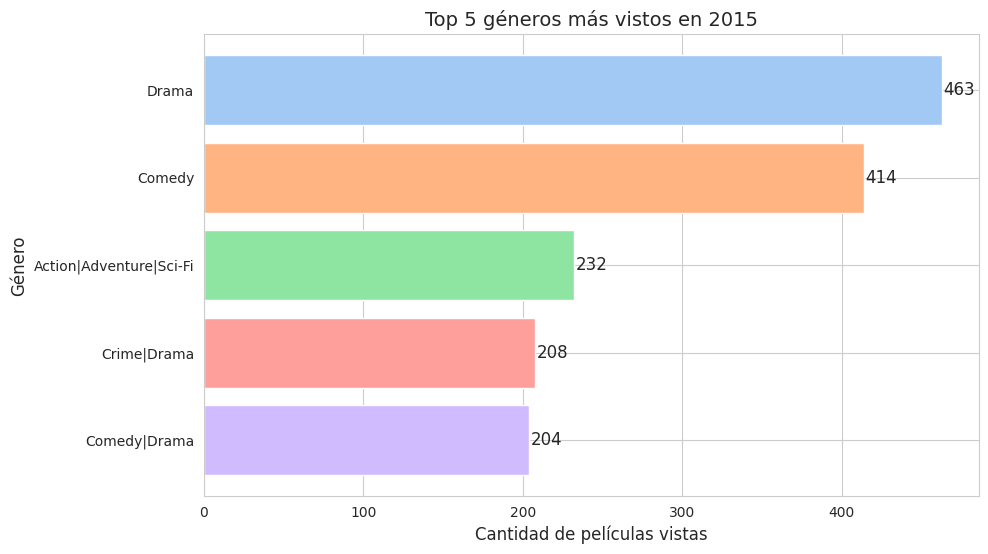

In [37]:


# Datos del top 5 géneros
genres = top_genres["genres"]
counts = top_genres["count"]

# Configurar el estilo
sns.set_style("whitegrid")

# Crear gráfico de barras horizontal
plt.figure(figsize=(10, 6))
bars = plt.barh(genres, counts, color=sns.color_palette("pastel", len(genres)))

# Agregar valores en las barras
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f"{int(bar.get_width())}", va='center', fontsize=12)

# Configuración de etiquetas y título
plt.xlabel("Cantidad de películas vistas", fontsize=12)
plt.ylabel("Género", fontsize=12)
plt.title("Top 5 géneros más vistos en 2015", fontsize=14)
plt.gca().invert_yaxis()  # Invierte el eje Y para que el género más visto esté arriba
plt.show()



In [38]:
#Feature Selection con correlación
import numpy as np
import pandas as pd

# Matriz de correlación
correlation_matrix = df_rating.corr()

# Umbral de correlación (ajustar según necesidad)
threshold = 0.9

# Seleccionar features altamente correlacionadas
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Eliminar features altamente correlacionadas
df_filtered = df_rating.drop(columns=correlated_features)

print("Features eliminadas:", correlated_features)


Features eliminadas: set()


In [39]:
#Preparar los datos para el modelo
from sklearn.model_selection import train_test_split

# Paso 1: Definir la variable objetivo (rating >= 4 es "Like", sino "Dislike")
df_filtered["liked"] = (df_filtered["rating"] >= 4).astype(int)

# Paso 2: Seleccionar las features relevantes
features = ["userId", "movieId"]  # Podemos agregar más features si es necesario
X = df_filtered[features]
y = df_filtered["liked"]

# Paso 3: Dividir en conjunto de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [40]:
#Entrenar el modelo de clasificación
#Se uso un RandomForestClassifier para predecir si a un usuario le gustará una película.

from sklearn.ensemble import RandomForestClassifier

# Paso 4: Entrenar el modelo
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [41]:
#Evaluacion de rendimiento del modelo


from sklearn.metrics import accuracy_score, classification_report

# Paso 5: Evaluar el modelo
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


Accuracy: 0.64
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.64      0.64     10649
           1       0.63      0.64      0.63     10419

    accuracy                           0.64     21068
   macro avg       0.64      0.64      0.64     21068
weighted avg       0.64      0.64      0.64     21068



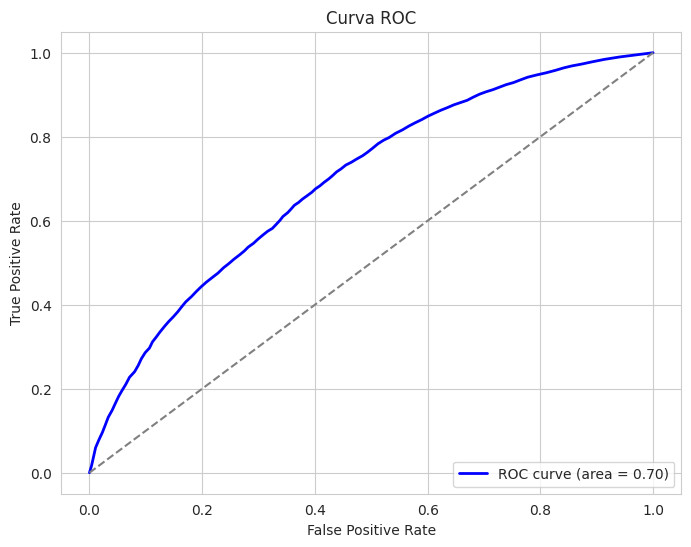

In [42]:
#Curva Roc y AUC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calcular la curva ROC
y_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


Conclusion
El modelo tiene un AUC-ROC de 0.7, lo que indica que puede distinguir entre usuarios a los que les gustará o no una película mejor que el azar (0.5), pero aún hay margen de mejora. Trate de agregar mas feature como los géneros de películas, popularidad, historial de calificaciones previas o embeddings de contenido, pero al ejecutar tardaba demasiado
Se utilizaron userId y movieId como principales campos, lo que hace que el modelo se base en el historial del usuario sin tener en cuenta otros campos como género, actores o sinopsis.

